In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix,\
classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  KFold



In [23]:
path = 'data'
labels_file = 'labels.csv'
distances_file = 'xyz_distances.csv'
angles_file = 'angles.csv'

labels_path = os.path.join(path, labels_file)
distances_path = os.path.join(path, distances_file)
angles_path = os.path.join(path, angles_file)



labels = pd.read_csv(labels_path)
distances = pd.read_csv(distances_path)
angles = pd.read_csv(angles_path)

features = pd.merge(distances, angles, on="pose_id")
all_data = pd.merge(labels, features, on="pose_id")




In [24]:
labels = all_data.iloc[:, [1]]
features = all_data.iloc[:, 2:]

data = [labels, features]
data = pd.concat(data, axis=1)

class_names = np.unique(labels[labels.columns].values)
class_counts = labels[labels.columns].value_counts()
labels[labels.columns] =  labels[labels.columns].apply(LabelEncoder().fit_transform)

data[labels.columns] =  data[labels.columns].apply(LabelEncoder().fit_transform)



/var/folders/vg/t3b5blds61gg_g1ctjjh7lg80000gn/T/ipykernel_3335/2041805851.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
correlation = features.corr()

In [26]:
fig = px.imshow(correlation, text_auto=True, aspect="auto", width=1000, height=1000, )
fig.show()

In [27]:
data

,pose,x_left_shoulder_left_wrist,y_left_shoulder_left_wrist,z_left_shoulder_left_wrist,x_right_shoulder_right_wrist,y_right_shoulder_right_wrist,z_right_shoulder_right_wrist,x_left_hip_left_ankle,y_left_hip_left_ankle,z_left_hip_left_ankle,...,x_right_hip_avg_right_wrist_right_ankle,y_right_hip_avg_right_wrist_right_ankle,z_right_hip_avg_right_wrist_right_ankle,right_elbow_right_shoulder_right_hip,left_elbow_left_shoulder_left_hip,right_knee_mid_hip_left_knee,right_hip_right_knee_right_ankle,left_hip_left_knee_left_ankle,right_wrist_right_elbow_right_shoulder,left_wrist_left_elbow_left_shoulder
0,0,2.639651,36.533203,11.606357,-2.096311,39.660770,3.333271,0.709485,34.756783,52.108757,...,1.893529,-16.874212,-13.826653,14.021934,8.209491,23.214672,129.223340,116.203650,138.059770,141.57338
1,0,5.621649,58.556816,-29.103119,-9.555062,60.220802,-24.859550,-1.686714,52.419790,-18.551620,...,6.796126,-35.755894,55.422730,67.077340,75.857120,6.334966,33.741722,33.625260,149.027540,155.01839
2,0,8.570704,61.962692,-30.658058,-11.030880,60.725990,-31.648384,-2.288830,49.784800,-25.031103,...,7.703906,-34.360416,64.989730,74.106384,75.378140,6.424555,29.761814,29.707142,150.370900,150.90870
3,0,12.450983,46.677666,-20.392890,-16.460460,50.275375,-17.970360,-2.673132,57.219868,-7.404943,...,10.238924,-34.275177,47.919495,60.998230,68.259796,7.821799,51.646942,49.793900,139.172230,146.24620
4,0,9.353104,27.570175,-10.257456,-8.173931,27.220562,-33.421550,-1.316952,49.857510,45.052310,...,5.099875,-18.971666,-0.777858,28.631880,20.923730,13.974962,133.069700,134.827160,122.640205,105.69104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,9,-6.080717,-2.000721,40.085506,-5.618984,-2.543819,52.891052,-1.096984,61.350044,-7.398081,...,-0.368320,-9.214743,-30.598433,88.235510,65.756500,50.746586,153.891650,155.704420,127.243510,113.52491
1368,9,-6.302826,-2.053581,39.421310,-8.082158,0.841747,47.154663,-1.904055,60.566288,-3.300932,...,1.313747,-9.965617,-31.047913,75.967130,58.247120,59.341410,164.500500,169.302370,128.314000,113.97117
1369,9,-6.192539,-1.493908,44.848100,-8.535187,1.105732,56.295902,-4.163429,65.969826,-8.856454,...,2.353637,-13.514111,-33.052555,100.986350,78.378910,37.588985,158.687580,158.541230,136.749200,119.12557
1370,9,-0.558686,3.230175,-44.923595,2.874543,-0.288628,-29.308783,-4.327272,64.305214,-4.709392,...,-1.608486,-12.126566,7.287651,60.776237,54.604183,16.760145,174.981900,175.047600,151.988110,155.36919


In [28]:
model = RandomForestClassifier(n_estimators = 100, max_depth=8, max_features=10, random_state=137)


In [29]:
kf = KFold(n_splits=5,shuffle=True)
X_test = pd.DataFrame()
y_test = pd.DataFrame()
result = []
i = 0
for train_index, test_index in kf.split(data):
    X_Ktrain = data.iloc[train_index].loc[:, features.columns]
    X_Ktest = data.iloc[test_index][features.columns]
    y_Ktrain = data.iloc[train_index].loc[:,'pose']
    y_Ktest = data.loc[test_index]['pose']
    
    #Train the model
    model.fit(X_Ktrain, y_Ktrain) #Training the model
    y_pred = model.predict(X_Ktest)
    result.append(f1_score(y_Ktest, y_pred, average=None))
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_Ktest, model.predict(X_Ktest))}")
    X_test = pd.concat([X_Ktest],)
    y_test = pd.concat([y_Ktest],)
    i += 1

Accuracy for the fold no. 0 on the test set: 0.8545454545454545
Accuracy for the fold no. 1 on the test set: 0.8363636363636363
Accuracy for the fold no. 2 on the test set: 0.8394160583941606
Accuracy for the fold no. 3 on the test set: 0.7737226277372263
Accuracy for the fold no. 4 on the test set: 0.781021897810219


In [30]:
print("Accuracy: ", np.mean(result))

Accuracy:  0.8108400591462704


In [51]:
predictions = model.predict(X_test)
#predictions_on_train = model.predict(X_train)


In [52]:

accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test: ", accuracy)



Accuracy on test:  0.8175182481751825


In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.84      0.79      0.82        34
           2       0.79      0.87      0.83        30
           3       1.00      0.58      0.73        31
           4       0.75      0.91      0.82        23
           5       0.94      0.91      0.92        33
           6       0.84      0.80      0.82        20
           7       0.71      0.77      0.74        22
           8       0.65      0.94      0.77        18
           9       0.86      0.77      0.81        31

    accuracy                           0.82       274
   macro avg       0.82      0.82      0.81       274
weighted avg       0.83      0.82      0.82       274



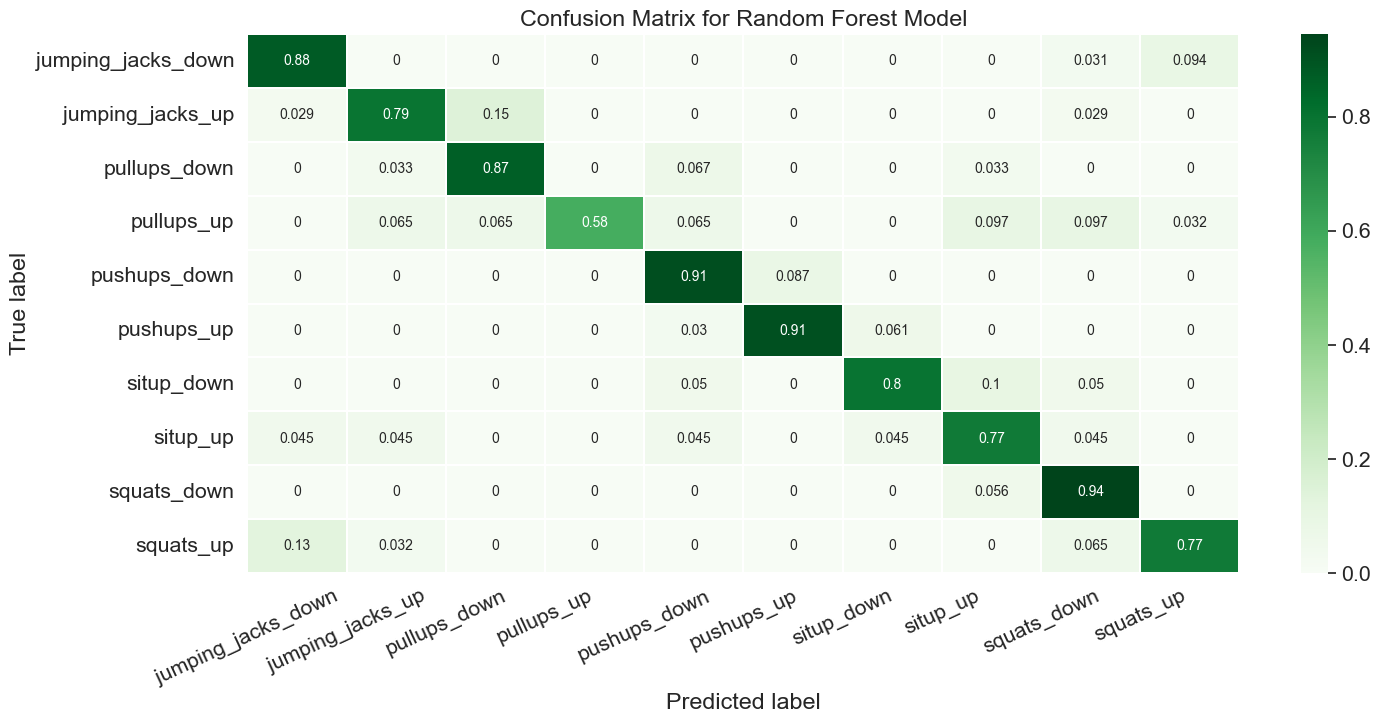

In [55]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sb.set(font_scale=1.4)
sb.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
